### Data extracted 27 May 2021

In [1]:
# import libraries
import pandas as pd
import requests
#import bs4 #not needed this time
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# e-Commerce site: ntuc
# url = https://www.fairprice.com.sg/category/rice-noodles-cooking-ingredients


In [16]:
# get from inspect network
test_url = 'https://website-api.omni.fairprice.com.sg/api/product/v2?category=rice-noodles-cooking-ingredients&experiments=recHome-Z%2CbsHome-Z%2CpastPurchaseCategory-B%2CsearchVariant-B%2CUnappliedPromoVariant-B%2CtrendH-Z%2CtimerVariant-Z%2CsubstitutionVariant-B%2CsubstitutionVariant-B%2CsubstitutionVariant-B%2CsubstitutionVariant-B&includeTagDetails=true&orderType=DELIVERY&page=2&pageType=category&slug=rice-noodles-cooking-ingredients&storeId=165&url=rice-noodles-cooking-ingredients'

In [17]:
# make test request
# no need for headers
test_res = requests.get(test_url)
test_res

<Response [200]>

In [18]:
# get the JSON from response; dynamic site
test_json = test_res.json()
test_json

{'code': 200,
 'status': 'SUCCESS',
 'data': {'count': 2967,
  'filters': {'side': {'Country Of Origin': [{'checked': False,
      'count': 121,
      'name': 'Australia',
      'slug': 'Australia'},
     {'checked': False, 'count': 7, 'name': 'Austria', 'slug': 'Austria'},
     {'checked': False,
      'count': 4,
      'name': 'Bangladesh',
      'slug': 'Bangladesh'},
     {'checked': False, 'count': 1, 'name': 'Bolivia', 'slug': 'Bolivia'},
     {'checked': False, 'count': 2, 'name': 'Brazil', 'slug': 'Brazil'},
     {'checked': False, 'count': 2, 'name': 'Burma', 'slug': 'Burma'},
     {'checked': False, 'count': 5, 'name': 'Cambodia', 'slug': 'Cambodia'},
     {'checked': False, 'count': 6, 'name': 'Canada', 'slug': 'Canada'},
     {'checked': False, 'count': 330, 'name': 'China', 'slug': 'China'},
     {'checked': False,
      'count': 2,
      'name': 'Czech Republic',
      'slug': 'Czech Republic'},
     {'checked': False, 'count': 1, 'name': 'Denmark', 'slug': 'Denmark'},
  

In [19]:
test_json.keys()

dict_keys(['code', 'status', 'data'])

In [20]:
test_json['data'].keys()

dict_keys(['count', 'filters', 'pagination', 'product'])

In [21]:
# Note that the total number of pages is dynamic! 
# Must be factored into compilation to avoid potential run-time errors.  
test_json['data']['pagination']

{'page': 2, 'page_size': 20, 'total_pages': 149}

In [22]:
test_product = test_json['data']['product']

In [23]:
#use pd.json_normalize to turn the dict into a DataFrame
test_df = pd.json_normalize(test_product)

In [24]:
test_df['storeSpecificData']

0     [{'currency': {'id': 106, 'name': 'SGD', 'symb...
1     [{'currency': {'id': 106, 'name': 'SGD', 'symb...
2     [{'currency': {'id': 106, 'name': 'SGD', 'symb...
3     [{'currency': {'id': 106, 'name': 'SGD', 'symb...
4     [{'currency': {'id': 106, 'name': 'SGD', 'symb...
5     [{'currency': {'id': 106, 'name': 'SGD', 'symb...
6     [{'currency': {'id': 106, 'name': 'SGD', 'symb...
7     [{'currency': {'id': 106, 'name': 'SGD', 'symb...
8     [{'currency': {'id': 106, 'name': 'SGD', 'symb...
9     [{'currency': {'id': 106, 'name': 'SGD', 'symb...
10    [{'currency': {'id': 106, 'name': 'SGD', 'symb...
11    [{'currency': {'id': 106, 'name': 'SGD', 'symb...
12    [{'currency': {'id': 106, 'name': 'SGD', 'symb...
13    [{'currency': {'id': 106, 'name': 'SGD', 'symb...
14    [{'currency': {'id': 106, 'name': 'SGD', 'symb...
15    [{'currency': {'id': 106, 'name': 'SGD', 'symb...
16    [{'currency': {'id': 106, 'name': 'SGD', 'symb...
17    [{'currency': {'id': 106, 'name': 'SGD', '

### Putting everything together

In [25]:
# base is the start of url
base_url = "https://website-api.omni.fairprice.com.sg/api/product/v2?category=fruits-vegetables&experiments=recHome-Z%2CbsHome-Z%2CpastPurchaseCategory-B%2CsearchVariant-B%2CUnappliedPromoVariant-B%2CtrendH-Z%2CtimerVariant-Z%2CsubstitutionVariant-B%2CsubstitutionVariant-B%2CsubstitutionVariant-B%2CsubstitutionVariant-B&includeTagDetails=true&page="


# end is the end of url
end_url = "&pageType=category&slug=rice-noodles-cooking-ingredients&storeId=165&url=rice-noodles-cooking-ingredients"

In [27]:
# declare an empty list to contain all pages' worth of DataFrames
df_list = []

# loop 1 to last page
print('Processing commences...')
for page_num in range(1,test_json['data']['pagination']['total_pages']+1):
    
    #if (abs(page_num))%100 == 0:
     #   print(f'processing page {page_num} of 458...')
    #if page_num%457 == 0:
     #   print(f'processing page {page_num} of 457.')
    # construct the temp URL
    temp_url = base_url + str(page_num) +end_url
    
    # make a GET request
    temp_res = requests.get(temp_url)
    
    # get json from response object
    temp_json = temp_res.json()
    
    # get the dataframe
    temp_df = pd.json_normalize(temp_json['data']['product'])
    
    #append df into list of dfs
    df_list.append(temp_df)

# combine the df in the list of dfs, into a huge df    
final_df = pd.concat(df_list)
# reset index
final_df.reset_index(drop=True,inplace=True)

# 
final_df

Processing commences...
processing page 100 of 458...


,barcodes,bulkOrderThreshold,categoryDataMapping,clientItemId,createdAt,description,final_price,handlingDays,hasVariants,has_stock,...,primaryCategory.parentCategory.parentCategory.parentCategory.id,primaryCategory.parentCategory.parentCategory.parentCategory.image,primaryCategory.parentCategory.parentCategory.parentCategory.languages,primaryCategory.parentCategory.parentCategory.parentCategory.name,primaryCategory.parentCategory.parentCategory.parentCategory.parentCategory,primaryCategory.parentCategory.parentCategory.parentCategory.productsCount,primaryCategory.parentCategory.parentCategory.parentCategory.slug,primaryCategory.parentCategory.parentCategory.parentCategory.status,primaryCategory.parentCategory.parentCategory.parentCategory.updatedBy,primaryCategory.parentCategory.parentCategory
0,"[8886303210207, 8888170880095, 8992717880186]",51,"[None, None, None, None]",91570,2019-04-27T04:00:58+08:00,,0,0,0,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[8888090720051],51,"[None, None, None]",13111322,2019-04-27T05:00:40+08:00,,0,0,0,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"[8888030300428, 8888030050453]",51,"[None, None, None, None, None, None, None]",13086205,2019-04-27T05:38:11+08:00,<p>It is grown and harvested in the Mekong Del...,0,0,0,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[8888229814620],51,"[None, None]",70227,2019-04-27T04:14:54+08:00,,0,0,0,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[8888090720105],51,"[None, None, None, None, None]",13111324,2019-04-27T05:00:40+08:00,<p>&bull; Singapore&#39;s No.1 rice brand&lt;b...,0,0,0,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2962,[8888397900231],51,"[None, None]",12618123,2019-04-27T03:57:45+08:00,,0,0,0,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2963,[8888351600023],0,"[None, None]",10860573,2019-04-27T03:57:07+08:00,,0,0,0,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2964,[5032722315556],0,"[None, None, None]",90028368,2020-08-13T03:46:26+08:00,None,0,4,0,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2965,[4986504302160],0,"[None, None, None]",90018314,2020-05-26T03:25:06+08:00,None,0,2,0,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# get the entire DataFrame's "storeSpecificData" column
store_data = final_df['storeSpecificData']

# create an empty list to store the rows of data
store_list =[]

# use a for loop to loop through each row to unpack the single list
for store in store_data:
    # normalize the first item in the list
    store_temp = pd.json_normalize(store[0])
    
    # append the DataFrame into the list
    store_list.append(store_temp)

# concat everything in the list into a single DataFrame
final_store_df = pd.concat(store_list)

# reset the DataFrame's index
final_store_df.reset_index(drop=True,inplace=True)

# 
final_store_df

,dailyPreset,discount,inStoreStock,inventoryType,mrp,onlineStock,overPickingThreshold,packInfo,sapStock,sapUnit,...,store.hasSelfCheckout,store.id,store.languages,store.latitude,store.longitude,store.metaData,store.name,store.pickingStoreId,store.status,store.tierSetupId
0,None,0.10,2269,None,0.9,954,None,None,2269,None,...,False,165,,1.326242,103.678352,None,Fairprice PFC,None,ENABLED,38
1,None,1.00,1207,None,16.8,757,None,None,1207,None,...,False,165,,1.326242,103.678352,None,Fairprice PFC,None,ENABLED,38
2,None,0.90,921,None,8.2,274,None,None,921,None,...,False,165,,1.326242,103.678352,None,Fairprice PFC,None,ENABLED,38
3,None,0,790,None,1.2,213,None,None,790,None,...,False,165,,1.326242,103.678352,None,Fairprice PFC,None,ENABLED,38
4,None,1.60,866,None,32.8,613,None,None,866,None,...,False,165,,1.326242,103.678352,None,Fairprice PFC,None,ENABLED,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2962,None,0,0,None,1.95,0,None,None,0,None,...,False,165,,1.326242,103.678352,None,Fairprice PFC,None,ENABLED,38
2963,None,0.30,0,None,1.55,0,None,None,0,None,...,False,165,,1.326242,103.678352,None,Fairprice PFC,None,ENABLED,38
2964,None,0,0,MKP,8.6,0,None,None,None,None,...,False,165,,1.326242,103.678352,None,Fairprice PFC,None,ENABLED,38
2965,None,0,0,MKP,7,0,None,None,None,None,...,False,165,,1.326242,103.678352,None,Fairprice PFC,None,ENABLED,38


In [29]:
# combine the 458-page DataFrame with the unpacked "storeSpecificData"
final_combined_df = pd.concat([final_df, final_store_df], axis = 1)
# 
final_combined_df

,barcodes,bulkOrderThreshold,categoryDataMapping,clientItemId,createdAt,description,final_price,handlingDays,hasVariants,has_stock,...,store.hasSelfCheckout,store.id,store.languages,store.latitude,store.longitude,store.metaData,store.name,store.pickingStoreId,store.status,store.tierSetupId
0,"[8886303210207, 8888170880095, 8992717880186]",51,"[None, None, None, None]",91570,2019-04-27T04:00:58+08:00,,0,0,0,False,...,False,165,,1.326242,103.678352,None,Fairprice PFC,None,ENABLED,38
1,[8888090720051],51,"[None, None, None]",13111322,2019-04-27T05:00:40+08:00,,0,0,0,False,...,False,165,,1.326242,103.678352,None,Fairprice PFC,None,ENABLED,38
2,"[8888030300428, 8888030050453]",51,"[None, None, None, None, None, None, None]",13086205,2019-04-27T05:38:11+08:00,<p>It is grown and harvested in the Mekong Del...,0,0,0,False,...,False,165,,1.326242,103.678352,None,Fairprice PFC,None,ENABLED,38
3,[8888229814620],51,"[None, None]",70227,2019-04-27T04:14:54+08:00,,0,0,0,False,...,False,165,,1.326242,103.678352,None,Fairprice PFC,None,ENABLED,38
4,[8888090720105],51,"[None, None, None, None, None]",13111324,2019-04-27T05:00:40+08:00,<p>&bull; Singapore&#39;s No.1 rice brand&lt;b...,0,0,0,False,...,False,165,,1.326242,103.678352,None,Fairprice PFC,None,ENABLED,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2962,[8888397900231],51,"[None, None]",12618123,2019-04-27T03:57:45+08:00,,0,0,0,False,...,False,165,,1.326242,103.678352,None,Fairprice PFC,None,ENABLED,38
2963,[8888351600023],0,"[None, None]",10860573,2019-04-27T03:57:07+08:00,,0,0,0,False,...,False,165,,1.326242,103.678352,None,Fairprice PFC,None,ENABLED,38
2964,[5032722315556],0,"[None, None, None]",90028368,2020-08-13T03:46:26+08:00,None,0,4,0,False,...,False,165,,1.326242,103.678352,None,Fairprice PFC,None,ENABLED,38
2965,[4986504302160],0,"[None, None, None]",90018314,2020-05-26T03:25:06+08:00,None,0,2,0,False,...,False,165,,1.326242,103.678352,None,Fairprice PFC,None,ENABLED,38


In [30]:
# export the DataFrame into a CSV
final_combined_df.to_csv('final_combined_hw.csv',index=None)

### Data processing

In [31]:
df_read = pd.read_csv('final_combined_hw.csv')
df_read.shape

(2967, 182)

In [32]:
df_read.columns

Index(['barcodes', 'bulkOrderThreshold', 'categoryDataMapping', 'clientItemId',
       'createdAt', 'description', 'final_price', 'handlingDays',
       'hasVariants', 'has_stock',
       ...
       'store.hasSelfCheckout', 'store.id', 'store.languages',
       'store.latitude', 'store.longitude', 'store.metaData', 'store.name',
       'store.pickingStoreId', 'store.status', 'store.tierSetupId'],
      dtype='object', length=182)

In [33]:
# manually select columns of interest
csi = ['bulkOrderThreshold','handlingDays','name','brand.name',
       'metaData.Country of Origin','metaData.Dietary Attributes','metaData.Supplier Name',
       'primaryCategory.parentCategory.name','inStoreStock','mrp']

In [34]:
# get the subset dataframe
df_i = df_read[csi].copy()
df_i.shape

(2967, 10)

In [35]:
df_i.tail(2)

,bulkOrderThreshold,handlingDays,name,brand.name,metaData.Country of Origin,metaData.Dietary Attributes,metaData.Supplier Name,primaryCategory.parentCategory.name,inStoreStock,mrp
2965,0,2,Nakato Salmon Cream Sauce,Nakato,Japan,NaN,NaN,Cooking Paste & Sauces,0,7.0
2966,51,0,Organic Tattva Basmati Rice - White,Organic Tattva,India,"['Organic', 'Halal']",SONNAMERA PTE LTD,Rice,0,7.2


In [36]:
# rename columns
df_i.rename(columns={
    'bulkOrderThreshold':'maxordQty',
    'brand.name':'Brand',
    'metaData.Country of Origin':'Origin',
    'metaData.Dietary Attributes':'DietaryAttr',
    'metaData.Supplier Name':'Supplier',
    'primaryCategory.parentCategory.name':'Cat',
    'inStoreStock':'storeStock',
    'mrp':'retailPrice'
}, inplace=True)

In [37]:
df_i.describe()

,maxordQty,handlingDays,storeStock,retailPrice
count,2967.000000,2967.000000,2967.000000,2967.000000
mean,16716.420290,1.057297,1078.373104,5.636569
std,37274.012032,1.469889,8265.735882,5.889080
min,0.000000,0.000000,0.000000,0.250000
25%,51.000000,0.000000,15.000000,2.480000
50%,51.000000,0.000000,35.000000,3.900000
75%,51.000000,2.000000,78.000000,6.500000
max,99999.000000,5.000000,71402.000000,67.800000


In [38]:
# Data wrangling challenge
df_test = df_i[['DietaryAttr']].copy()

In [39]:
df_test['DietaryAttr'].unique()

array(['[]', "['Halal']", "['Healthier Choice', 'Vegetarian', 'Halal']",
       "['Halal', 'Healthier Choice']",
       "['Halal', 'Healthier Choice', 'Vegetarian']",
       "['Healthier Choice', 'Organic', 'Trans-Fat Free']",
       "['Halal', 'Trans-Fat Free', 'Vegetarian']",
       "['Halal', 'Healthier Choice', 'Trans-Fat Free', 'Vegetarian']",
       "['Healthier Choice']",
       "['Healthier Choice', 'Trans-Fat Free', 'Halal']", nan,
       "['Healthier Choice', 'Organic']", "['Healthier Choice', 'Halal']",
       "['Trans-Fat Free', 'Halal']", "['Trans-Fat Free']",
       "['Halal', 'Trans-Fat Free', 'Gluten-Free', 'Lactose-Free', 'Hypoallergenic']",
       "['Lactose-Free', 'Trans-Fat Free', 'Vegetarian']",
       "['Halal', 'Vegetarian']",
       "['Healthier Choice', 'Trans-Fat Free']",
       "['Halal', 'Healthier Choice', 'Trans-Fat Free']",
       "['Vegetarian']",
       "['Vegetarian', 'Trans-Fat Free', 'Gluten-Free']",
       "['Halal', 'Trans-Fat Free']", "['Vegetaria

In [40]:
# Convert to string values for data cleaning
df_test["DietaryAttr"] = df_test["DietaryAttr"].astype(str)
df_test["DietaryAttr"] = [x.replace("[","").replace("'","").replace("]","") for x in df_test["DietaryAttr"]]
df_test["DietaryAttr"].shape

(2967,)

In [41]:
### Putting this together for data wrangling
# Interest on Healthier choices, trans-fat free and lactose free
hc_lst = []
tff_lst = []
lf_lst = []

for attr in df_test['DietaryAttr']:
        
    # Healthier Choice   
    if 'Healthier Choice' in attr:
        hc = 'Yes'
    else:
        hc = 'No'
    hc_lst.append(hc)
        
    # Trans-fat indicator
    if 'Trans-Fat Free' in attr:
        tff = 'Yes'
    else:
        tff = 'No'
    tff_lst.append(tff)
        
    # Lactose-free indicator    
    if 'Lactose-Free' in attr:
        lf = 'Yes'
    else:
        lf = 'No'
    lf_lst.append(lf)

In [42]:
df_hc = pd.DataFrame(hc_lst,columns=['LowerSugar'])
df_tff = pd.DataFrame(tff_lst,columns=['TransFat'])
df_lf = pd.DataFrame(lf_lst,columns=['LactoseFree'])

frames = [df_hc,df_tff,df_lf]
result = pd.concat(frames, axis=1)


In [43]:
df_inew = pd.concat([df_i,result],axis=1)
df_inew.shape

(2967, 13)

In [44]:
df_inew.tail(1)

,maxordQty,handlingDays,name,Brand,Origin,DietaryAttr,Supplier,Cat,storeStock,retailPrice,LowerSugar,TransFat,LactoseFree
2966,51,0,Organic Tattva Basmati Rice - White,Organic Tattva,India,"['Organic', 'Halal']",SONNAMERA PTE LTD,Rice,0,7.2,No,No,No


In [45]:
df_inew2 = df_inew.drop(['DietaryAttr'],axis=1).copy()

In [46]:
df_inew2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2967 entries, 0 to 2966
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   maxordQty     2967 non-null   int64  
 1   handlingDays  2967 non-null   int64  
 2   name          2967 non-null   object 
 3   Brand         2955 non-null   object 
 4   Origin        2967 non-null   object 
 5   Supplier      1469 non-null   object 
 6   Cat           2967 non-null   object 
 7   storeStock    2967 non-null   int64  
 8   retailPrice   2967 non-null   float64
 9   LowerSugar    2967 non-null   object 
 10  TransFat      2967 non-null   object 
 11  LactoseFree   2967 non-null   object 
dtypes: float64(1), int64(3), object(8)
memory usage: 278.3+ KB


In [47]:
# convert data types
df_inew2.convert_dtypes().dtypes

maxordQty         Int64
handlingDays      Int64
name             string
Brand            string
Origin           string
Supplier         string
Cat              string
storeStock        Int64
retailPrice     float64
LowerSugar       string
TransFat         string
LactoseFree      string
dtype: object

In [48]:
# Any null values?
df_inew2.isnull().any()

maxordQty       False
handlingDays    False
name            False
Brand            True
Origin          False
Supplier         True
Cat             False
storeStock      False
retailPrice     False
LowerSugar      False
TransFat        False
LactoseFree     False
dtype: bool

In [49]:
null_columns=df_inew2.columns[df_inew2.isnull().any()]
df_inew2[null_columns].isnull().sum()

Brand         12
Supplier    1498
dtype: int64

In [50]:
df_inew2[df_inew2['Brand'].isnull()]

,maxordQty,handlingDays,name,Brand,Origin,Supplier,Cat,storeStock,retailPrice,LowerSugar,TransFat,LactoseFree
333,51,0,Heinz Seriously Good Mayonnaise,NaN,United Kingdom,NaN,Condiments,83,5.15,No,No,No
1432,51,0,Chuan Heng Bee Stir Fry Sauce - Spicy Mala,NaN,China,NaN,Cooking Paste & Sauces,76,3.65,No,No,No
1467,51,0,Lee Kum Kee Superior Soy Sauce - Light,NaN,China,NaN,Condiments,33,7.95,No,No,No
1812,51,0,ABC Homestyle Sambal Terasi,NaN,Indonesia,NaN,Cooking Paste & Sauces,1,3.70,No,No,No
2045,0,0,Chuan Heng Bee Fried Silver Fish,NaN,Indonesia,NaN,Dried Food,19,6.95,No,No,No
2148,51,0,Chuan Heng Bee Hotpot Soup Base - Tomato,NaN,China,NaN,Soups,46,3.65,No,No,No
2369,51,0,ABC Terasi Udang Paste (Shrimp),NaN,Indonesia,NaN,Cooking Paste & Sauces,31,1.70,No,No,No
2417,51,0,Chuan Heng Bee Hotpot Soup Base - Spicy Mala,NaN,China,NaN,Soups,43,3.65,No,No,No
2546,51,0,Chuan Heng Bee Hotpot Soup Base - Mushroom,NaN,China,NaN,Soups,54,3.65,No,No,No
2609,51,0,Colavita Extra Virgin Olive Oil with Basil Sea...,NaN,Italy,NaN,Oil,32,8.10,No,No,No


In [51]:
# replace the values for Brand
df_inew2.loc[279,'Brand'] = 'Heinz'
df_inew2.loc[1421,'Brand'] = 'Chuan Heng Bee'
df_inew2.loc[1545,'Brand'] = 'Lee Kum Kee'
df_inew2.loc[1830,'Brand'] = 'ABC'
df_inew2.loc[2248,'Brand'] = 'ABC'
df_inew2.loc[2501,'Brand'] = 'Chuan Heng Bee'
df_inew2.loc[6611,'Brand'] = 'Colavita'
df_inew2.loc[8166,'Brand'] = 'Barilla'
df_inew2.loc[8261,'Brand'] = 'Tiger'

In [52]:
# check
df_inew2.loc[df_inew2.index==8261]['Brand']

8261    Tiger
Name: Brand, dtype: object

In [53]:
# replace NaN Supplier and Cat with 'no info'
df_inew2['Supplier'].fillna('no info',inplace=True)
df_inew2['Cat'].fillna('no info',inplace=True)

In [54]:
# export the DataFrame into a CSV
df_inew2.to_csv('df_inew.csv',index=None)

### Visualize Data

In [2]:
df_viz = pd.read_csv('df_inew.csv')
df_viz.tail(1)

,maxordQty,handlingDays,name,Brand,Origin,Supplier,Cat,storeStock,retailPrice,LowerSugar,TransFat,LactoseFree
2969,NaN,NaN,NaN,Tiger,NaN,no info,no info,NaN,NaN,NaN,NaN,NaN


In [3]:
# Style
plt.style.use('ggplot')
# fontsize
# title
tfs = 16
# suptitle
stfs = 14
# axes
afs = 14
# axesticks
ats = 14

# Plot horizontal bar chart function
def hb(df,col,title,figname,colorname):
    plt.subplots(figsize=(14,12))
    plt.barh(df[col].value_counts().sort_values().index,
             df[col].value_counts().sort_values(),color=colorname,alpha=0.7)

    # Remove the upper & right frameline
    sns.despine()

    # Title
    plt.title(title,fontsize=tfs, loc='left')

    # Axes
    plt.yticks(fontsize=ats)
    plt.xlabel('Item count',fontsize=afs)
    plt.xticks(fontsize=ats)

    plt.tight_layout()
    plt.savefig(figname)
    plt.show()

* We want to see the Country of origin for rice, noodles and cooking ingredients 

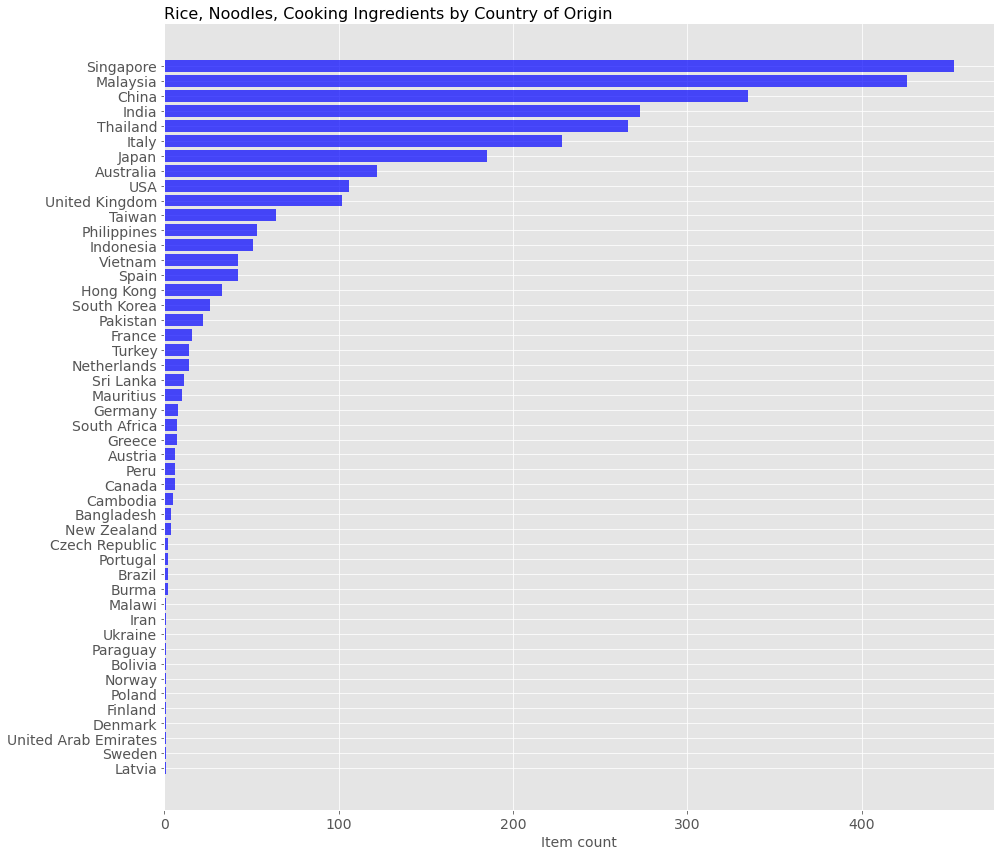

In [57]:
# data (Origin)
hb(df_viz,'Origin','Rice, Noodles, Cooking Ingredients by Country of Origin','Country of Origin.png','blue')

* Items by Category

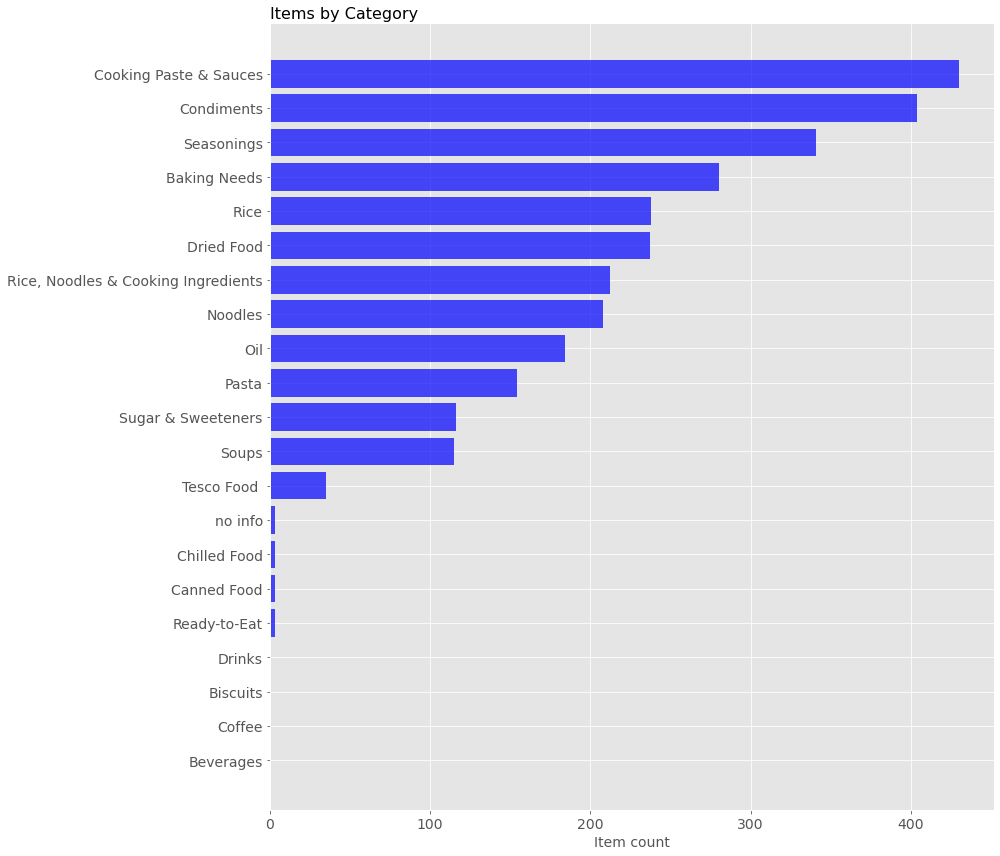

In [58]:
# Data (Cat)
# Plot
hb(df_viz,'Cat','Items by Category','Items(Cat).png','blue')

* Investigate the distribution of item price

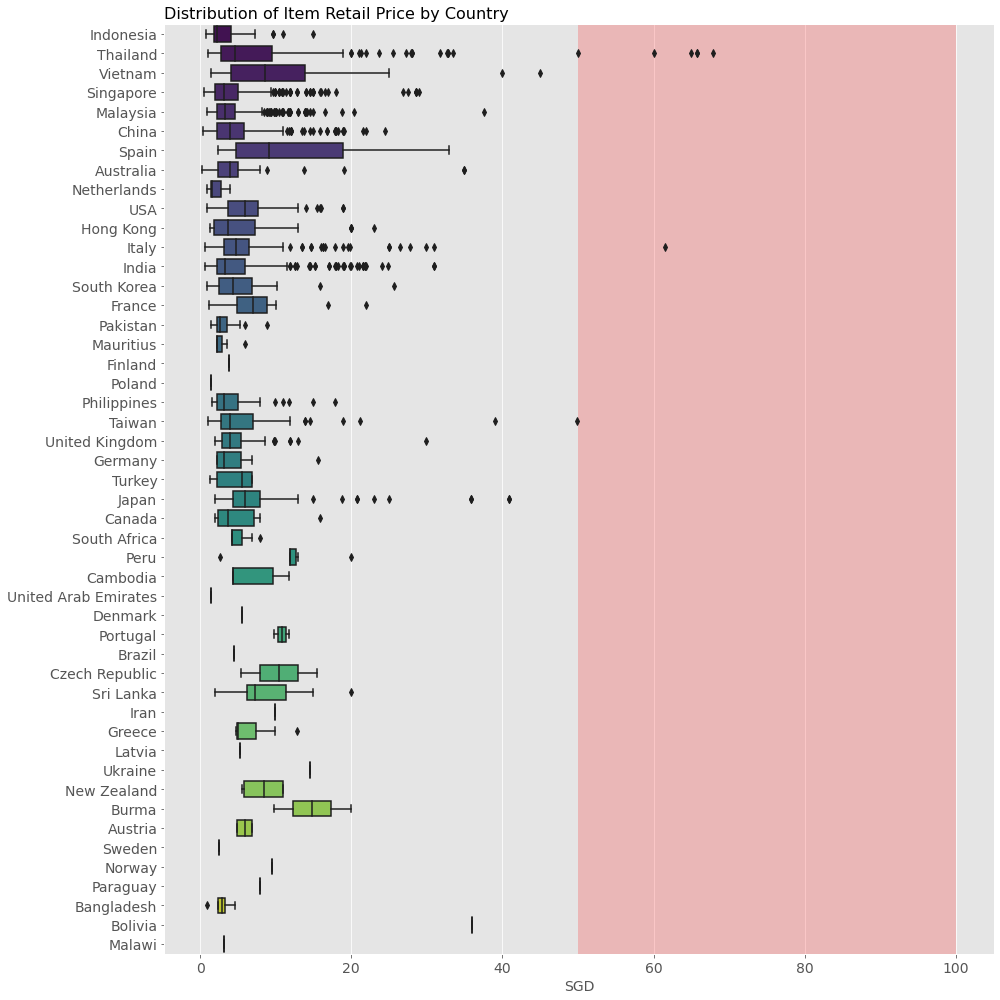

In [62]:
# data (retailPrice, Origin)

# Plot
fig,ax = plt.subplots(figsize=(14,14))
ax = sns.boxplot(y='Origin',x='retailPrice',data=df_viz,palette = 'viridis')
# Rectangle
ax.axvspan(xmin=50,xmax=100, facecolor='r',alpha=0.2)

# Title
ax.set_title('Distribution of Item Retail Price by Country',fontsize=tfs, loc='left')
# Axes
ax.set_ylabel('')
plt.yticks(fontsize=ats)
ax.set_xlabel('SGD',fontsize=afs)
plt.xticks(fontsize=ats)


plt.tight_layout()
plt.savefig('RetailPrice by Country.png')
plt.show()

In [5]:
df_ex = df_viz.loc[df_viz['retailPrice']>50].copy()

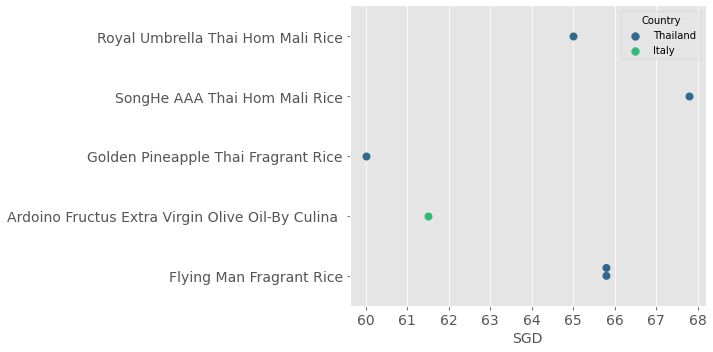

In [12]:
# data (retailPrice, Origin, name)

# Plot
ax = sns.catplot(x='retailPrice',y='name',hue='Origin',data=df_ex, kind='swarm',s=8,
                 palette = 'viridis', legend_out=False,
                 height=5, aspect=2)

# Axes
ax.set_xlabels('SGD', fontsize=afs)
ax.set_ylabels('')
ax.set_xticklabels(fontsize=ats)
ax.set_yticklabels(fontsize=ats)

# Legend
ax._legend.set_title('Country')
plt.tight_layout()
plt.savefig('Items above 100.png')
plt.show()

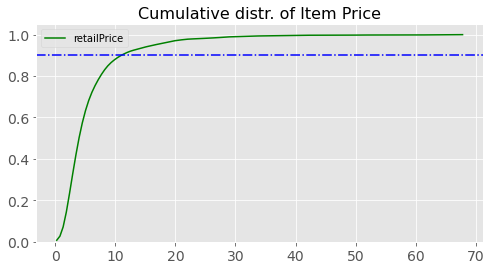

In [61]:
# data (retailPrice)

# Plot
fig,ax = plt.subplots(figsize=(8,4))
ax= sns.kdeplot(data=df_viz['retailPrice'], cut=0,cumulative=True,color='g')

# Horizontal line @90%
ax.axhline(0.9, 0, 450, color = 'b', linestyle='-.')
# Title
ax.set_title('Cumulative distr. of Item Price', fontsize=tfs)

# Axes
plt.yticks(fontsize=ats)
plt.xticks(fontsize=ats)
plt.savefig('Price cum_distr.png')
plt.show()

* Look at items below 100sgd

In [63]:
df_lwrprice = df_viz.loc[df_viz['retailPrice']<100].copy()
df_lwrprice.shape

(2967, 12)

In [64]:
df_lwrprice.loc[(df_lwrprice['LactoseFree']=='Yes')]['Cat'].value_counts()

Condiments                             33
Noodles                                33
Seasonings                             21
Pasta                                  17
Dried Food                             15
Cooking Paste & Sauces                 13
Rice                                   12
Oil                                    11
Baking Needs                            7
Sugar & Sweeteners                      5
Soups                                   3
Rice, Noodles & Cooking Ingredients     1
Name: Cat, dtype: int64

* 10 most expensive Cooking Paste & Sauces items that are lactose free (under 100sgd).

In [65]:
df_sauces = df_lwrprice.loc[(df_lwrprice['LactoseFree']=='Yes') & 
                (df_lwrprice['Cat'] == 'Cooking Paste & Sauces')].sort_values('retailPrice').reset_index(drop=True)

In [66]:
# 5 Priceiest sauces (lactose-free) under 100sgd
df_sauces.iloc[-5:]

,maxordQty,handlingDays,name,Brand,Origin,Supplier,Cat,storeStock,retailPrice,LowerSugar,TransFat,LactoseFree
8,0.0,3.0,AAA NYONYA SAUCE,AAA,Malaysia,no info,Cooking Paste & Sauces,35.0,4.9,No,Yes,Yes
9,0.0,5.0,Mekhala Organic Szechuan Mala Chilli Paste,Mekhala,Thailand,no info,Cooking Paste & Sauces,63.0,5.9,No,Yes,Yes
10,0.0,5.0,Mekhala Organic Tom Yum Paste,Mekhala,Thailand,no info,Cooking Paste & Sauces,46.0,5.9,No,Yes,Yes
11,0.0,2.0,Bull Head Sauce - Spicy Mala,Bull Head,Taiwan,no info,Cooking Paste & Sauces,9.0,6.9,No,Yes,Yes
12,99999.0,3.0,Da Paolo Gastronomia Aglio Olio Funghi Pasta S...,Da Paolo Gastronomia,Singapore,no info,Cooking Paste & Sauces,18.0,10.5,No,No,Yes


* How about healthier choices (i.e. lower sugar)?

In [67]:
df_lwrprice.loc[(df_lwrprice['LowerSugar']=='Yes')]['Cat'].value_counts()

Oil                                    67
Rice, Noodles & Cooking Ingredients    41
Rice                                   40
Condiments                             33
Cooking Paste & Sauces                 22
Seasonings                             18
Noodles                                12
Soups                                  10
Dried Food                              8
Baking Needs                            3
Pasta                                   3
Chilled Food                            3
Sugar & Sweeteners                      2
Name: Cat, dtype: int64

In [68]:
# Look at Sugar & Sweeteners
df_lwrprice.loc[(df_lwrprice['LowerSugar']=='No') & 
                        (df_lwrprice['Cat'] == 'Sugar & Sweeteners')]

,maxordQty,handlingDays,name,Brand,Origin,Supplier,Cat,storeStock,retailPrice,LowerSugar,TransFat,LactoseFree
19,51.0,0.0,SIS White Sugar - Fine Grain,Sis,Australia,JOO KOON DC,Sugar & Sweeteners,465.0,1.90,No,No,No
46,51.0,0.0,Marigold Dawn Sweetened Beverage Creamer,Marigold,Singapore,JOO KOON DC,Sugar & Sweeteners,368.0,2.50,No,No,No
52,51.0,0.0,SIS Brown Sugar - Fine Textured,Sis,Singapore,JOO KOON DC,Sugar & Sweeteners,271.0,3.35,No,No,No
56,51.0,0.0,SIS Caster Sugar - Extra Fine,Sis,Singapore,JOO KOON DC,Sugar & Sweeteners,313.0,2.65,No,No,No
63,51.0,0.0,Marigold Evaporated Milk - King Of Kings (Full...,Marigold,Singapore,JOO KOON DC,Sugar & Sweeteners,460.0,1.60,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...
2639,0.0,3.0,Now Foods Real Food Certified Organic Turbinad...,Now Foods,USA,no info,Sugar & Sweeteners,181.0,18.90,No,No,No
2643,0.0,3.0,Now Foods Real Food Certified Organic Turbinad...,Now Foods,USA,no info,Sugar & Sweeteners,181.0,18.90,No,No,No
2731,51.0,0.0,Origins Healthfood Organic Raw Sugar,Origins,Australia,ORIGINS HEALTHCARE PTE LTD,Sugar & Sweeteners,31.0,5.30,No,Yes,Yes
2883,0.0,2.0,Ambikas Jaggery - Round,Sri Ambikas,India,SRI AMBIKAS PTE LTD,Sugar & Sweeteners,11.0,1.60,No,No,No


In [69]:
df_hc = df_lwrprice.loc[(df_lwrprice['LowerSugar']=='Yes') & 
                        (df_lwrprice['Cat'] == 'Sugar & Sweeteners')].sort_values('retailPrice').reset_index(drop=True)

In [70]:
df_hc.iloc[-5:]

,maxordQty,handlingDays,name,Brand,Origin,Supplier,Cat,storeStock,retailPrice,LowerSugar,TransFat,LactoseFree
0,51.0,0.0,Carnation Evaporated Milk - Low Fat,Carnation,Thailand,no info,Sugar & Sweeteners,381.0,1.85,Yes,No,No
1,51.0,0.0,Milkmaid Sweetened Condensed Milk - Skimmed (L...,Milkmaid,Thailand,no info,Sugar & Sweeteners,569.0,1.90,Yes,No,No


* Handling days on average

C:\Users\65943\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\65943\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


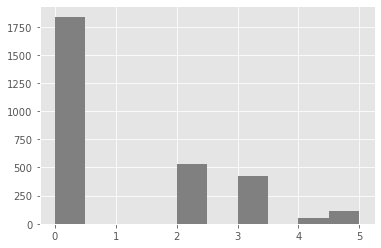

In [71]:
plt.hist(df_viz['handlingDays'],color='grey');